In [10]:
from confluent_kafka import Consumer
import json

conf = {
    'bootstrap.servers': 'broker1-kr:9092',
    'group.id': 'taxi_consumer_group',
    'auto.offset.reset': 'earliest'
}
consumer = Consumer(conf)
consumer.subscribe(['yellow_taxi_stream'])

print("Consuming messages from 'yellow_taxi_stream'...")

try:
    while True:
        msg = consumer.poll(1.0)
        if msg is None:
            continue
        if msg.error():
            print("Consumer error:", msg.error())
            continue

        data = json.loads(msg.value().decode('utf-8'))
        print("Consumed:", data)
except KeyboardInterrupt:
    pass
finally:
    consumer.close()


Consumed: {'vendor_id': 2, 'pickup_datetime': '2024-12-01T00:46:00', 'dropoff_datetime': '2024-12-01T00:56:55', 'passenger_count': 1, 'trip_distance': 2.9600000381469727, 'rate_code_id': 1, 'store_and_fwd_flag': 0, 'payment_type': 1, 'fare_amount': 15.600000381469727, 'extra': 1.0, 'mta_tax': 0.5, 'tip_amount': 6.179999828338623, 'tolls_amount': 0.0, 'improvement_surcharge': 1.0, 'total_amount': 26.780000686645508, 'congestion_surcharge': 2.5, 'airport_fee': 0.0, 'pickup_longitude': -74.00788116455078, 'pickup_latitude': 40.7177734375, 'dropoff_longitude': -74.00401306152344, 'dropoff_latitude': 40.7533073425293, 'pickup_borough': 'Manhattan', 'dropoff_borough': 'Manhattan'}
Consumed: {'vendor_id': 1, 'pickup_datetime': '2024-12-01T00:46:00', 'dropoff_datetime': '2024-12-01T00:54:03', 'passenger_count': 1, 'trip_distance': 1.2999999523162842, 'rate_code_id': 1, 'store_and_fwd_flag': 0, 'payment_type': 1, 'fare_amount': 9.300000190734863, 'extra': 3.5, 'mta_tax': 0.5, 'tip_amount': 2.0,

In [ ]:
from confluent_kafka import Consumer
import json

conf = {
    'bootstrap.servers': 'broker1-kr:9092',
    'group.id': 'taxi_consumer_group',
    'auto.offset.reset': 'earliest'
}
consumer = Consumer(conf)
consumer.subscribe(['yellow_taxi_stats'])

print("Consuming messages from 'yellow_taxi_stream'...")

try:
    while True:
        msg = consumer.poll(1.0)
        if msg is None:
            continue
        if msg.error():
            print("Consumer error:", msg.error())
            continue

        data = json.loads(msg.value().decode('utf-8'))
        print("Consumed:", data)
except KeyboardInterrupt:
    pass
finally:
    consumer.close()

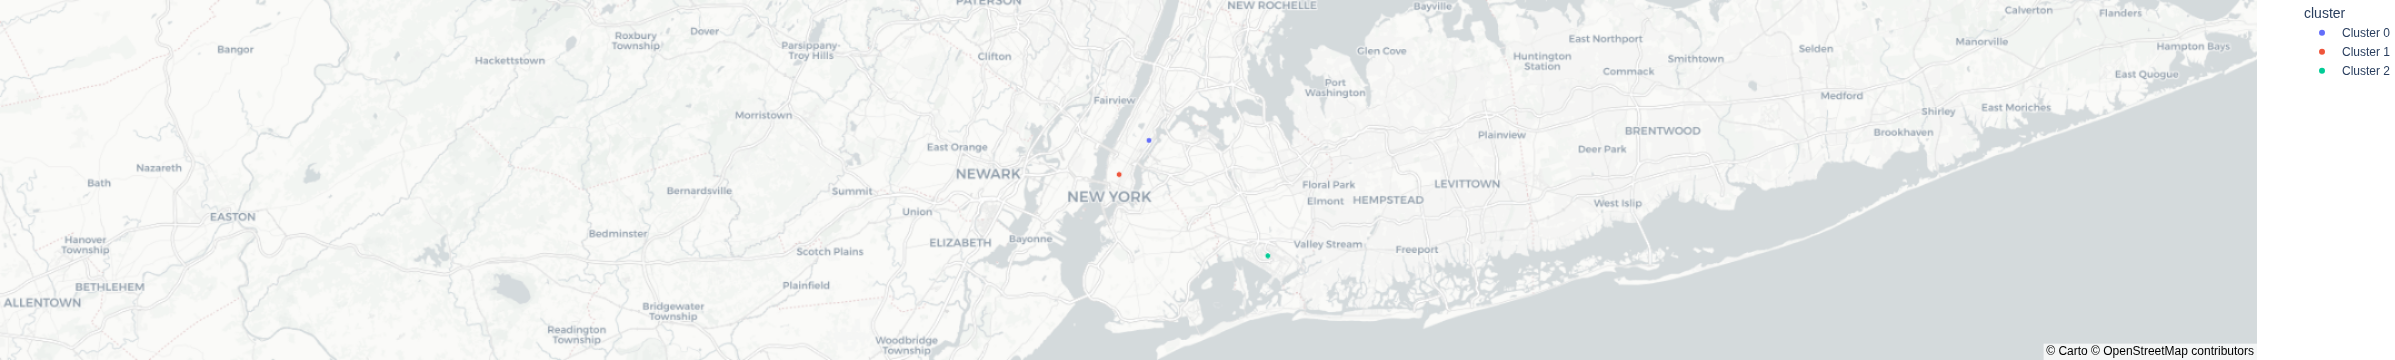

In [13]:
from confluent_kafka import Consumer
import json
import plotly.express as px
import pandas as pd
import numpy as np
import time
from IPython.display import display, clear_output

NUM_CLUSTERS = 3

centroids = np.array([[40.75, -74.0], [40.73, -73.93], [40.70, -74.15]])

conf = {
    'bootstrap.servers': 'broker1-kr:9092',
    'group.id': 'taxi_consumer_group',
    'auto.offset.reset': 'earliest'
}
consumer = Consumer(conf)
consumer.subscribe(['yellow_taxi_cluster_stream'])

print("Consuming messages from 'yellow_taxi_cluster_stream'...")

try:
    while True:
        msg = consumer.poll(1.0)
        if msg is None:
            continue
        if msg.error():
            print("Consumer error:", msg.error())
            continue

        update = json.loads(msg.value().decode('utf-8'))
        cid = update['cluster_id']
        centroids[cid] = [update['lat'], update['lng']]
    
        df = pd.DataFrame(centroids, columns=["lat", "lon"])
        df["cluster"] = [f"Cluster {i}" for i in range(NUM_CLUSTERS)]
    
        fig = px.scatter_mapbox(df, lat="lat", lon="lon", color="cluster", zoom=9)
        fig.update_layout(mapbox_style="carto-positron",
                          mapbox_center={"lat": 40.73, "lon": -73.98},
                          margin={"r":0,"t":0,"l":0,"b":0})
    
        clear_output(wait=True)
        display(fig)
        time.sleep(3)
except KeyboardInterrupt:
    pass
finally:
    consumer.close()









